<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/mlc_2324_w4_webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Decision Trees for Classification

* Machine Learning Concepts (MLC)
* Webinar, Week 4, 2023/24
* Luciano Gerber

## Preamble: Importing and Configuring Essential Packages


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import sys
if 'google.colab' in sys.modules:
    !pip install -q --user dtreeviz
import dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.0 MB/s eta 0:00:00


## Loading and Pre-Processing Penguins Dataset

In [ ]:
penguins = sns.load_dataset("penguins")
penguins = penguins.drop(columns=['island', 'sex'])
X = penguins.drop(columns='species')
y = penguins['species']
X = X.fillna(X.mean())

In [ ]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000


In [ ]:
penguins.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0


In [ ]:
y.head()

0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
Name: species, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape, X_test.shape

((258, 4), (86, 4))

## A First Decision: Quick Iteration

In [ ]:
dt3 = DecisionTreeClassifier(max_depth=3)
dt3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
balanced_accuracy_score(y_test, dt3.predict(X_test))

0.9761904761904763

In [ ]:
balanced_accuracy_score(y_train, dt3.predict(X_train))

0.9559829978269695

Wow, OK, quite high scores on both train and test data. Probably because this is an easy problem. Still, performance on train being lower than test is an indication of underfitting. It could be just our luck with the samples we've taken (that is why we'll use cross-validation in the future - repeated sampling), but I'll try another configuration.

In [ ]:
dt4 = DecisionTreeClassifier(max_depth=4)
dt4.fit(X_train, y_train)
(
    balanced_accuracy_score(y_test, dt4.predict(X_test)),
    balanced_accuracy_score(y_train, dt4.predict(X_train))
)

(0.9761904761904763, 0.9872507581727441)

What does this model look like? Decision trees are (more) interpretable models; we can understand the mechanics behind the predictions. Let us have a look at a textual representation of the tree first.

In [ ]:
print(
    export_text(dt4, feature_names=X.columns.to_list())
)

|--- flipper_length_mm <= 206.50
|   |--- bill_length_mm <= 44.65
|   |   |--- bill_length_mm <= 42.30
|   |   |   |--- bill_depth_mm <= 16.65
|   |   |   |   |--- class: Adelie
|   |   |   |--- bill_depth_mm >  16.65
|   |   |   |   |--- class: Adelie
|   |   |--- bill_length_mm >  42.30
|   |   |   |--- flipper_length_mm <= 189.50
|   |   |   |   |--- class: Chinstrap
|   |   |   |--- flipper_length_mm >  189.50
|   |   |   |   |--- class: Adelie
|   |--- bill_length_mm >  44.65
|   |   |--- body_mass_g <= 4550.00
|   |   |   |--- bill_depth_mm <= 21.15
|   |   |   |   |--- class: Chinstrap
|   |   |   |--- bill_depth_mm >  21.15
|   |   |   |   |--- class: Adelie
|   |   |--- body_mass_g >  4550.00
|   |   |   |--- bill_depth_mm <= 17.35
|   |   |   |   |--- class: Gentoo
|   |   |   |--- bill_depth_mm >  17.35
|   |   |   |   |--- class: Adelie
|--- flipper_length_mm >  206.50
|   |--- bill_depth_mm <= 17.65
|   |   |--- class: Gentoo
|   |--- bill_depth_mm >  17.65
|   |   |--- bi

Can I make `dtreeviz` work for a nicer graphical representation of the tree?

In [ ]:
dt =  DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [ ]:
print(export_text(dt, feature_names=X.columns.to_list()))

|--- flipper_length_mm <= 206.50
|   |--- class: Adelie
|--- flipper_length_mm >  206.50
|   |--- class: Gentoo



In [ ]:
dtviz = dtreeviz.model(
    dt, X, y, feature_names=X.columns,
    class_names=y.unique(), target_name='Species',
)
dtviz.view(scale=1.5, fontname='sans-serif')

TypeError: ignored

In [ ]:
y.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()
y_enc = enc.fit_transform(y)

In [ ]:
y_enc[:5]

array([0, 0, 0, 0, 0])

In [ ]:
y.head(5).to_numpy()

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie'], dtype=object)

In [ ]:
np.unique(y_enc)

array([0, 1, 2])

In [ ]:
np.unique(y.to_numpy())

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, random_state=0)

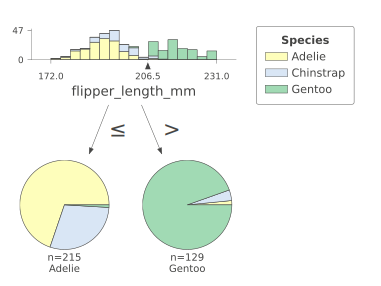

In [ ]:
dt =  DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)
dtviz = dtreeviz.model(
    dt, X, y_enc, target_name='Species', feature_names=X.columns,
    class_names=y.unique()
)
dtviz.view(scale=1.5, fontname='sans-serif')

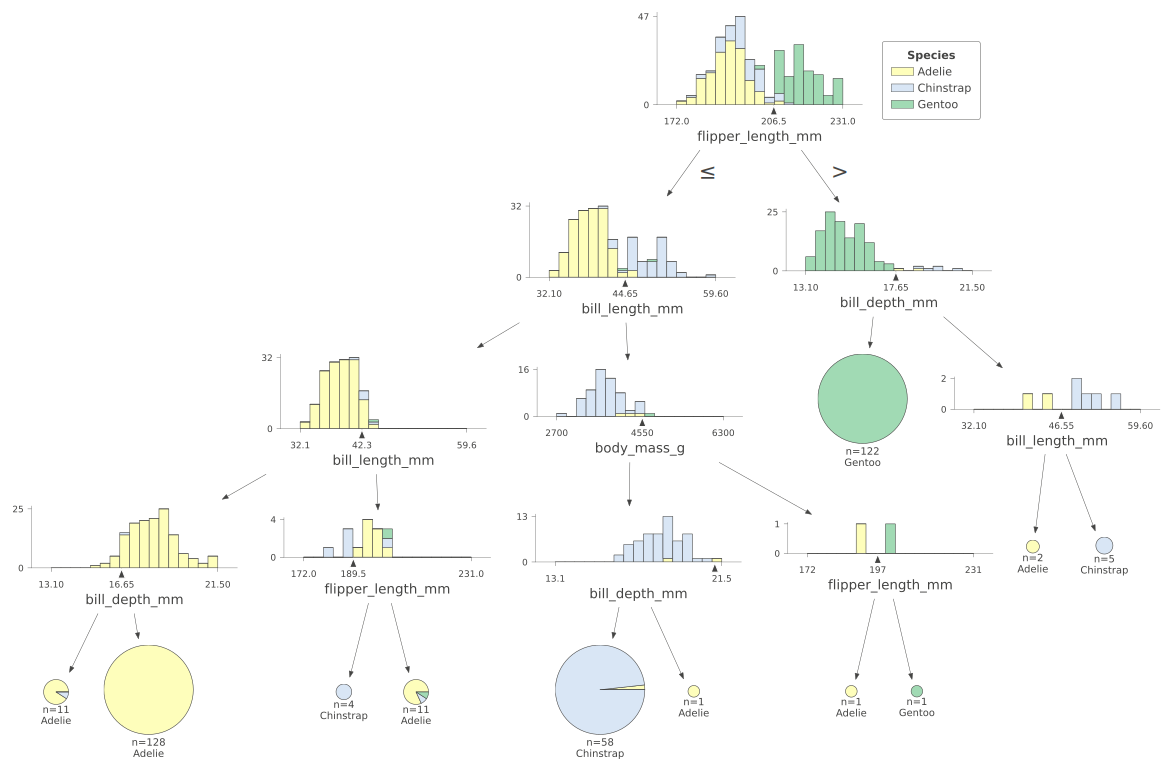

In [ ]:
dt4 =  DecisionTreeClassifier(max_depth=4)
dt4.fit(X_train, y_train)
dtviz = dtreeviz.model(
    dt4, X, y_enc,
    feature_names=X.columns, target_name='Species', class_names=y.unique()
)
dtviz.view(scale=1.5, fontname='sans-serif')

What I don't like about the above? Gosh - there are some branches classifying a single observation. Too specific. I will reconfigure it so as to increase the threshold for splitting nodes.

In [ ]:
dt4 =  DecisionTreeClassifier(max_depth=4, min_samples_split=10, min_samples_leaf=5)
dt4.fit(X_train, y_train)
dtviz = dtreeviz.model(
    dt4, X, y_enc,
    feature_names=X.columns, target_name='Species', class_names=y.unique()
)
dtviz.view(scale=1.5, fontname='sans-serif')

In [ ]:
(
    balanced_accuracy_score(y_test, dt4.predict(X_test)),
    balanced_accuracy_score(y_train, dt4.predict(X_train))
)

## Adelie, Chinstrap, Gentoo

![](https://www.bas.ac.uk/wp-content/uploads/2015/04/Penguin-heights-736x419.jpg)


<!-- ![Gentoo](https://cdn.download.ams.birds.cornell.edu/api/v1/asset/115369831/1800)

### Adelie

![Adelie](https://cdn.download.ams.birds.cornell.edu/api/v1/asset/362643231/900)

### Chinstrap

![Chinstrap](https://cdn.britannica.com/08/152708-050-23B255B3/Chinstrap-penguin.jpg) -->


<!-- <img src="https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.britannica.com%2Fanimal%2Fchinstrap-penguin&psig=AOvVaw3gTV7SN7Rbe_BR2peLBvsb&ust=1698448268273000&source=images&cd=vfe&ved=0CBEQjRxqFwoTCOis2cTslIIDFQAAAAAdAAAAABAE" width="350"/> <img src="https://cdn.britannica.com/08/152708-050-23B255B3/Chinstrap-penguin.jpg" width="200"/> <img src="https://cdn.download.ams.birds.cornell.edu/api/v1/asset/115369831/1800" width="350"/> -->



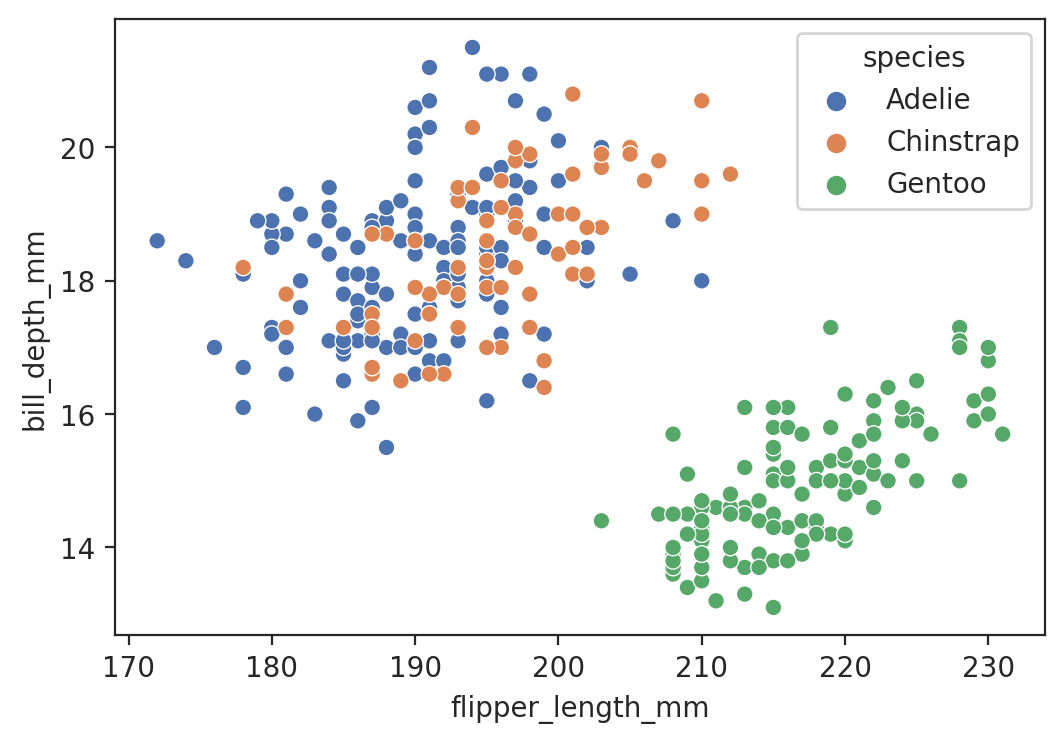

In [ ]:
sns.scatterplot(data=penguins, x='flipper_length_mm', y='bill_depth_mm', hue='species');

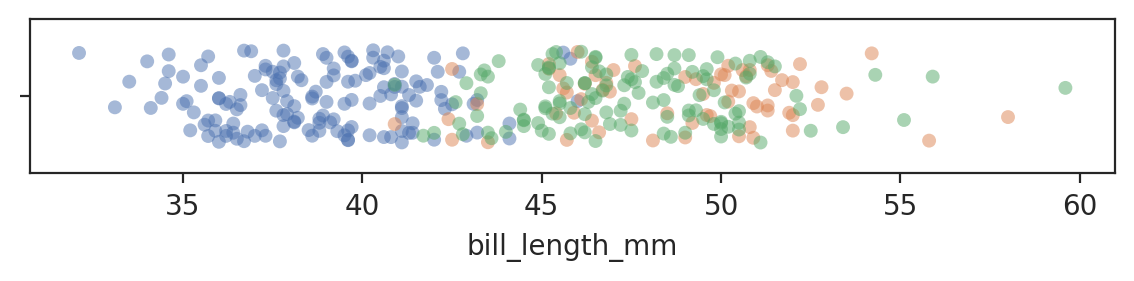

In [ ]:
fig, ax = plt.subplots(figsize=(7,1))
sns.stripplot(
    data=penguins, x='bill_length_mm', hue='species',
    jitter=0.3, alpha=0.5, legend=False, ax=ax
);

## Evaluation of Currently Selected Model

In [ ]:
dt = dt4

In [ ]:
(
    balanced_accuracy_score(y_test, dt.predict(X_test)),
    balanced_accuracy_score(y_train, dt.predict(X_train))
)

(0.9761904761904763, 0.9872507581727441)

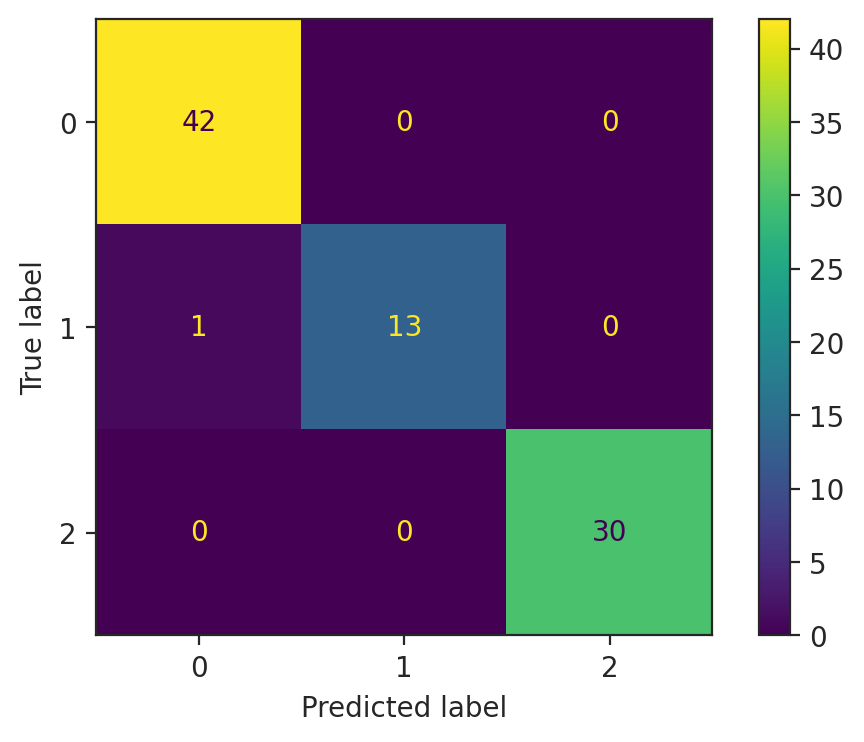

In [ ]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, dt.predict(X_test))
).plot();

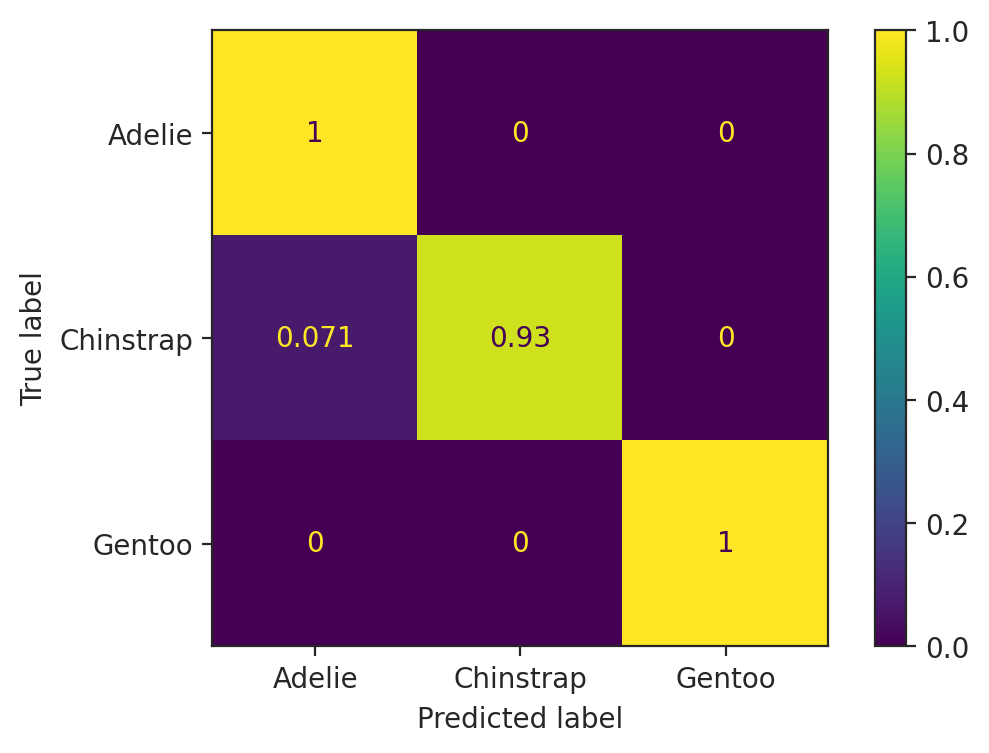

In [ ]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, dt.predict(X_test), normalize='true'),
    display_labels=y.unique()
).plot();

## How is Performing on Some Selected Samples?


In [ ]:
Xy = pd.concat([X, y], axis='columns')

In [ ]:
Xy.head(1)

In [ ]:
test_samples = Xy.query("species=='Chinstrap'").sample(5, random_state=1)
test_samples

In [ ]:
y_pred = dt.predict(test_samples.drop(columns='species'))
y_pred

In [ ]:
enc.inverse_transform(y_pred)